<a href="https://colab.research.google.com/github/anadiedrichs/curso-aprendizaje-automatico/blob/main/clase_2_regresion_lineal_introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 2.

## Regresión lineal simple

### Introducción

Comenzaremos con la regresión lineal más conocida, un ajuste de línea recta a los datos.


Un ajuste de línea recta es un modelo de la forma:
$$
y = ax + b
$$
donde $a$ se conoce comúnmente como la *pendiente* y $b$ se conoce comúnmente como la *intersección*.

Considere los siguientes datos, que están dispersos en una línea con una pendiente de 2 y una intersección de –5 (vea la siguiente figura):

### Generamos datos sintéticos

Datos sintéticos son aquellos datos que no son reales, sino generados usando funciones y aleatoriedad.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

Genero datos usando $ y = 2 x - 5 + \epsilon $

In [18]:
y = 2 * x - 5 + rng.randn(50)

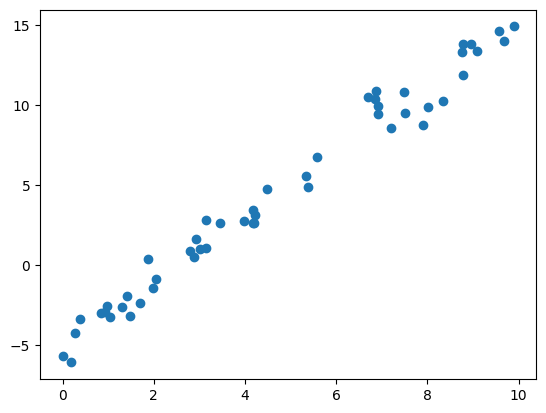

In [19]:

plt.scatter(x, y);

### Regresión lineal

Podemos utilizar el estimador LinearRegression de Scikit-Learn para ajustar estos datos y construir la línea de mejor ajuste, como se muestra en la siguiente figura:

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)


LinearRegression()

In [29]:

xfit = np.linspace(0, 10, 50)

In [30]:
xfit.shape

(50,)

In [31]:
y.shape

(50,)

In [32]:

yfit = model.predict(xfit[:, np.newaxis])


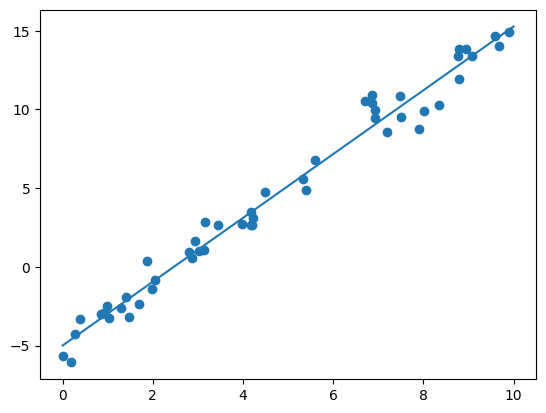

In [33]:

plt.scatter(x, y)
plt.plot(xfit, yfit);

La pendiente y la intersección de los datos están contenidas en los parámetros de ajuste del modelo, que en Scikit-Learn siempre están marcados con un guión bajo al final.
Aquí los parámetros relevantes son `coef_` e `intercept_`:

In [34]:
print("Pendiente del modelo:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Pendiente del modelo:     2.0272088103606953
Model intercept: -4.998577085553204


Vemos que los resultados son muy cercanos a los valores utilizados para generar los datos, como podríamos esperar.

In [35]:
y.shape

(50,)

In [40]:
y_pred = model.predict(x[:, np.newaxis])

error = y - y_pred
print("Error de los datos respecto al modelo:")
print(error)


Error de los datos respecto al modelo:
[-0.80206234 -1.04262028 -0.67270017 -0.09634861 -1.1586638   0.20786855
  1.60770007  0.64659828 -0.30121418 -1.0356575  -0.86263905  1.50459161
 -0.00624418 -0.87734387  0.18204073  1.91640599  0.00519237  0.46376734
  0.26054979 -0.40757382 -1.36181418 -0.61421809 -0.29559614  0.39682753
  0.59910544  0.68626734  0.26102489  0.87309191 -0.80202969  1.01251311
  0.4847479  -0.41409412  0.22646489 -0.22206256  0.94195494  1.43254585
  1.99736376 -1.62501097 -1.45051274 -0.70999412 -0.11044318  0.67117903
  0.23790656 -2.23837765 -0.3357135   0.70468523 -0.01854621  0.68069935
 -0.3020513  -0.23756021]


### Calculamos errores

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular métricas de error (ej. MSE, RMSE)

mae = mean_absolute_error(y, model.predict(x[:, np.newaxis]))
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y, model.predict(x[:, np.newaxis]))
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


r2 = r2_score(y, model.predict(x[:, np.newaxis]))
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.7200436983357034
Mean Squared Error (MSE): 0.8183388570266171
Root Mean Squared Error (RMSE): 0.9046208360559783
R-squared (R2): 0.9790800609430612


## Regresión lineal multidimensional



### Introducción


Sin embargo, el estimador `LinearRegression` es mucho más capaz que esto: además de los ajustes de línea recta simples, también puede manejar modelos lineales multidimensionales de la forma:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde hay múltiples valores de $x$.
Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones superiores.

La naturaleza multidimensional de tales regresiones las hace más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción al generar algunos datos de ejemplo, utilizando el operador de multiplicación de matrices de NumPy:

$$
Y = aX + b
$$

### Generamos dataset sintético

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])


In [ ]:
X.shape

### MOdelo de regresión lineal

In [ ]:

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

Aquí, los datos $y$ se construyen a partir de una combinación lineal de tres valores $x$ aleatorios, y la regresión lineal recupera los coeficientes utilizados para construir los datos.

De esta manera, podemos utilizar el estimador `LinearRegression` único para ajustar líneas, planos o hiperplanos a nuestros datos.
Aún parece que este enfoque estaría limitado a relaciones estrictamente lineales entre variables, pero resulta que también podemos flexibilizar este aspecto.

## Otro ejemplo de regresión lineal simple

Referencia: [ejemplo tomado de la libreria Scikit-learn]( https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


Preprocesamiento

In [ ]:

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


In [ ]:
diabetes_X.shape

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]


In [ ]:
diabetes_X.shape

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]


In [ ]:
diabetes_X_train


In [ ]:

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
diabetes_X_train

Entrenamiento del modelo

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


In [ ]:

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


In [ ]:

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Métricas en regresión

En análisis de regresión, las métricas se utilizan para evaluar la precisión y calidad de las predicciones realizadas por un modelo de regresión. A continuación, se presentan algunas de las métricas más comunes utilizadas en regresión:

### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


La métrica de MAE calcula la diferencia entre las predicciones y los valores reales, y luego toma la media de estas diferencias. Un valor pequeño de MAE indica una mayor precisión en las predicciones.



### Mean Squared Error (MSE)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

La métrica de MSE es similar a la de MAE, pero utiliza el cuadrado de las diferencias entre predicciones y valores reales. Esto hace que los errores grandes tengan un mayor impacto en el cálculo de la métrica. Un valor pequeño de MSE indica una mayor precisión en las predicciones.



### Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

La métrica de RMSE es el cuadrado root de la MSE. Esto permite expresar el error en términos de una unidad estándar (como la unidad de medida de la variable dependiente). Un valor pequeño de RMSE indica una mayor precisión en las predicciones.



### Coefficient of Determination (R²)
La métrica de R² mide la proporción de la variabilidad de la variable dependiente que se explica por la regresión. Un valor cercano a 1 indica que la regresión explica la mayoría de la variabilidad, mientras que un valor cercano a 0 indica que la regresión no explica mucho.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$



### Mean Absolute Percentage Error (MAPE)
La métrica de MAPE calcula la diferencia entre las predicciones y los valores reales, y luego divide por el valor real. Luego, toma la media de estas razones. Un valor pequeño de MAPE indica una mayor precisión en las predicciones.

$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100\%$$



## Uso de las métricas

Selección de la Métrica Adecuada
La elección de la métrica adecuada depende del problema específico y de los objetivos del modelo. Algunos factores a considerar son:

* Escalas de las variables: Si las variables tienen escalas muy diferentes, es recomendable utilizar métricas que sean invariantes a la escala, como el coeficiente de determinación o el MAPE. Además MAPE es útil cuando se necesita una métrica que penalice los errores relativos en términos de porcentaje.
* Distribución de los errores: Si los errores tienen una distribución normal, el MSE puede ser una buena opción. Si los errores tienen una distribución no normal, puede ser más adecuado utilizar el MAE.
* Importancia de los errores grandes: Si los errores grandes son particularmente problemáticos, el RMSE puede ser una mejor opción que el MAE.

* MAE y MSE son útiles cuando se necesita una métrica que penalice los errores grandes.
* RMSE es útil cuando se necesita una métrica que exprese el error en términos de una unidad estándar.
* R² es útil cuando se necesita evaluar la capacidad de la regresión para explicar la variabilidad de la variable dependiente.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que tienes y_true (valores reales) e y_pred (valores predichos)

mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


## Conclusión

En resumen, las métricas de regresión son herramientas importantes para evaluar la precisión y calidad de las predicciones realizadas por un modelo de regresión. Cada métrica tiene sus propias características y ventajas, y es importante elegir la adecuada para el problema específico que se está intentando resolver.